<a href="https://colab.research.google.com/github/dina-almajali/Machine-Learning/blob/main/Recommendation%20Engine/Job_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Job Recommendation System


A job recommendation system is an application that recommends jobs based on the skills and the user’s desired role.

LinkedIn is one of the most popular applications using a job recommendation system to help its users find the best jobs according to their skills and desired positions.

Uploading the dataset from the link: https://www.kaggle.com/datasets/promptcloud/jobs-on-naukricom

In [ ]:
#importing python libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#uploading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/jobs.csv', nrows= 20000)

In [ ]:
dataset.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [ ]:
#Removing the unnamed column
dataset = dataset.drop("Unnamed: 0",axis=1)

In [ ]:
dataset.shape

(20000, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Job Salary               20000 non-null  object
 1   Job Experience Required  20000 non-null  object
 2   Key Skills               20000 non-null  object
 3   Role Category            20000 non-null  object
 4   Functional Area          20000 non-null  object
 5   Industry                 20000 non-null  object
 6   Job Title                20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [ ]:
#Checking if there is a null value
print(dataset.isnull().sum())

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64


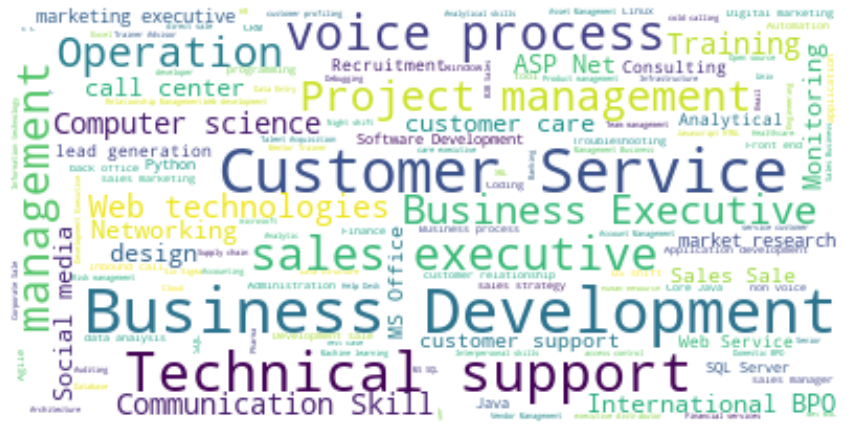

In [ ]:
#Visuals
#Checking the high demand skills
text = " ".join(i for i in dataset["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

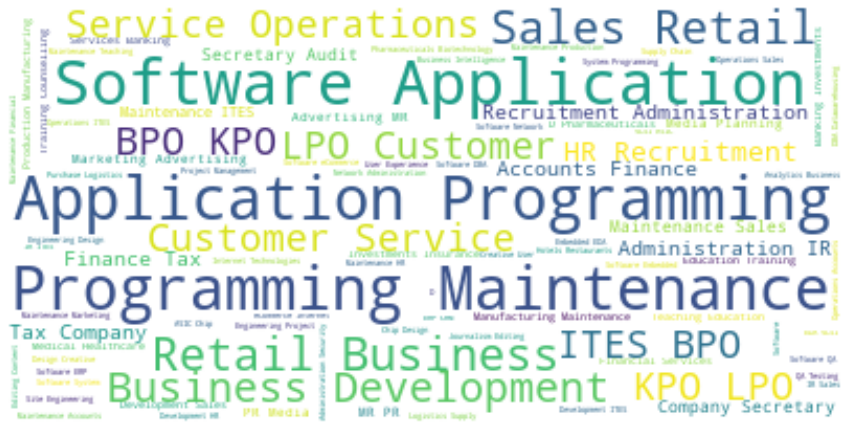

In [ ]:
#Checking the high demand functional areas

text = " ".join(i for i in dataset["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

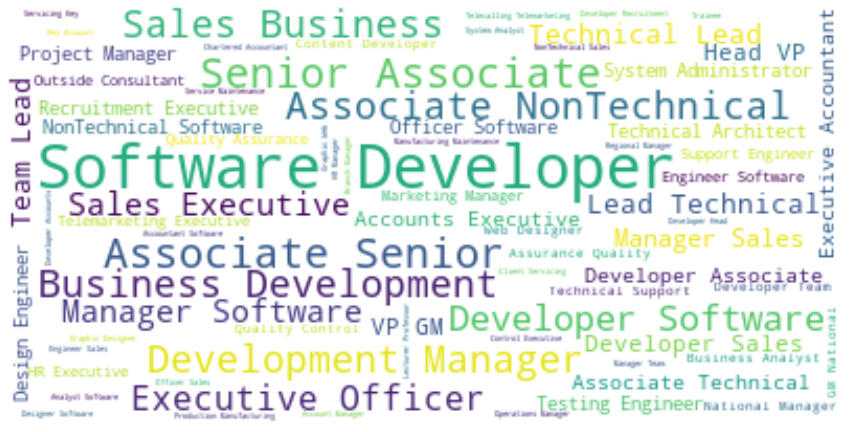

In [ ]:
#Checking the high demand jobs

text = " ".join(i for i in dataset["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text Based Similarity 

In [ ]:
#Preparing the data 

dataset_new = dataset[['Job Title', 'Key Skills']]

df = dataset_new[dataset_new['Job Title'].str.len() <= 30]

df_filtered = df.groupby(['Job Title'])['Key Skills'].apply('|'.join).reset_index()

df_filtered.head()

,Job Title,Key Skills
0,2nd Engineer,Second Engineer & 3rd Officer-Container Cargo ...
1,Academic Coordinator,school| education| training| administration| ...
2,Accessory Designer,accessory designer| furnishing| Merchandising...
3,Account Director,sales account| digital marketing| social medi...
4,Accounts Executive/Accountant,filing| tds| service industry| pf| esi| retur...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object to the vectorizer variable
vectorizer = TfidfVectorizer(min_df=2)

# Fit and transform the Key Skills column
vectorized_data = vectorizer.fit_transform(df_filtered['Key Skills'])

In [ ]:
# Look at the features generated
print(vectorizer.get_feature_names())

['10', '10g', '11', '11g', '11i', '14001', '2000', '20000', '2005', '2008', '220kv', '27001', '2d', '2g', '32', '365', '3d', '3ds', '3dsmax', '3g', '3gpp', '3pl', '4g', '4gl', '802', '9001', 'ab', 'abap', 'abaqus', 'abb', 'ability', 'abinitio', 'abm', 'abroad', 'ac', 'acad', 'academic', 'academics', 'accent', 'acceptance', 'access', 'accessibility', 'accessories', 'account', 'accountancy', 'accountant', 'accounting', 'accounts', 'ach', 'achievement', 'acme', 'acquiring', 'acquisition', 'acrobat', 'act', 'action', 'actions', 'activation', 'active', 'activemq', 'activities', 'actuarial', 'ad', 'adam', 'adas', 'adf', 'adfs', 'admin', 'administration', 'administrative', 'administrator', 'admission', 'admissions', 'ado', 'adobe', 'ads', 'advance', 'advanced', 'advertisement', 'advertising', 'advice', 'advisor', 'advisors', 'advisory', 'advocate', 'adwords', 'aem', 'aeronautical', 'aerospace', 'affairs', 'affiliate', 'africa', 'after', 'agency', 'agent', 'agile', 'agreements', 'agrochemical'

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(vectorized_data.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Create Dataframe from TF-IDFarray
tfidf_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
tfidf_df.index = df_filtered['Job Title']
tfidf_df.head()

,10,10g,11,11g,11i,14001,2000,20000,2005,2008,...,yii,youtube,yui,zabbix,zbm,zend,zoho,zonal,zoology,zsm
Job Title,,,,,,,,,,,,,,,,,,,,,
2nd Engineer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Academic Coordinator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Accessory Designer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Account Director,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Accounts Executive/Accountant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Import cosine_similarity measure
from sklearn.metrics.pairwise import cosine_similarity 

In [ ]:
# Create the array of cosine similarity values
cosine_similarity_array = cosine_similarity(tfidf_df)

In [ ]:
# Wrap the array in a pandas DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=tfidf_df.index, columns=tfidf_df.index)

In [ ]:
# Print the top 5 rows of the DataFrame
cosine_similarity_df.head(5)

Job Title,2nd Engineer,Academic Coordinator,Accessory Designer,Account Director,Accounts Executive/Accountant,Accounts Manager,Actuary Manager,Affiliate Marketing Manager,Anaesthetist,Analyst,...,User Experience Designer,VP/Principal/Partner,Visualiser,Voice & Accent Trainer,Waiter / Waitress / Sommelier,Warehouse Manager,Wealth Manager,Web Designer,Webmaster,Workman/Foreman/Technician
Job Title,,,,,,,,,,,,,,,,,,,,,
2nd Engineer,1.000000,0.06228,0.000000,0.000000,0.014141,0.002454,0.000000,0.000000,0.000000,0.010247,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.009752,0.000000,0.000000,0.000000,0.027834
Academic Coordinator,0.062280,1.00000,0.000000,0.000000,0.014710,0.005567,0.000000,0.000000,0.068017,0.011167,...,0.018333,0.000000,0.003509,0.054506,0.000000,0.004958,0.000000,0.001620,0.000000,0.008127
Accessory Designer,0.000000,0.00000,1.000000,0.007343,0.010700,0.021713,0.012057,0.000000,0.000000,0.024135,...,0.044770,0.007420,0.023391,0.003723,0.012063,0.031724,0.038609,0.045078,0.001494,0.015667
Account Director,0.000000,0.00000,0.007343,1.000000,0.057818,0.099921,0.005461,0.183717,0.000000,0.059663,...,0.002306,0.066730,0.037309,0.004518,0.014637,0.033346,0.078533,0.052622,0.261088,0.022844
Accounts Executive/Accountant,0.014141,0.01471,0.010700,0.057818,1.000000,0.868993,0.040057,0.026243,0.013384,0.287757,...,0.007869,0.030839,0.022714,0.046135,0.035687,0.087289,0.133344,0.015834,0.034062,0.045055


In [ ]:
# Find the values for the job 
cosine_similarity_series = cosine_similarity_df.loc['Data Analyst']

In [ ]:
# Sort these values highest to lowest
ordered_similarities = cosine_similarity_series.sort_values(ascending = False)

In [ ]:
# Print the results
print(ordered_similarities.iloc[:20])


Job Title
Data Analyst                     1.000000
Head/VP/GM - Analytics & BI      0.738184
Analytics Manager                0.719575
Business/EDP Analyst             0.683705
Database Architect/Designer      0.623599
Business Analyst                 0.565042
Technology Manager               0.538970
Bio-Statistician                 0.504421
Process Flow Analyst             0.434746
Datawarehousing Technician       0.431148
System Analyst                   0.396364
Head/VP/GM-Technology(IT)/CTO    0.379299
Technical Architect              0.375002
Team Lead/Technical Lead         0.371106
Research Scientist               0.356709
Other                            0.342211
Outside Consultant               0.340634
Sales Head                       0.319790
Analyst                          0.303927
EDP Analyst                      0.293911
Name: Data Analyst, dtype: float64


Finding Jobs Based on the Skills

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2)
tfidf_matrix = tfidf.fit_transform(dataset["Key Skills"])
similarity = cosine_similarity(tfidf_matrix)
print(similarity)


[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.07998786]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.07998786 ... 0.         0.         1.        ]]


In [ ]:
indices = pd.Series(dataset.index, index=dataset['Job Title'])

print(indices)

Job Title
Media Planning Executive/Manager           0
Sales Executive/Officer                    1
R&D Executive                              2
Technical Support Engineer                 3
Testing Engineer                           4
                                       ...  
Industrial Engineer                    19995
Design Engineer                        19996
Software Developer                     19997
Telecalling/Telemarketing Executive    19998
Program Manager                        19999
Length: 20000, dtype: int64


In [ ]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    print(index)
    
    similarity_scores = (enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, reverse=True)

    similarity_scores = similarity_scores[0:9]

    print(similarity_scores)

    newsindices = []
    for i in similarity_scores:
      newsindices.append(i[0])

    return dataset[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Design Engineer"))

Job Title
Design Engineer       69
Design Engineer       72
Design Engineer      316
Design Engineer      470
Design Engineer      476
                   ...  
Design Engineer    19814
Design Engineer    19853
Design Engineer    19868
Design Engineer    19880
Design Engineer    19996
Length: 171, dtype: int64
[(170, array([0.        , 0.05016535, 0.03554889, ..., 0.        , 0.        ,
       0.06186172])), (169, array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.04656688])), (168, array([0.        , 0.        , 0.10816585, ..., 0.        , 0.        ,
       0.        ])), (167, array([0., 0., 0., ..., 0., 0., 0.])), (166, array([0.        , 0.        , 0.06260506, ..., 0.        , 0.        ,
       0.10894451])), (165, array([0.        , 0.09178047, 0.        , ..., 0.        , 0.        ,
       0.        ])), (164, array([0.        , 0.        , 0.08315123, ..., 0.        , 0.        ,
       0.        ])), (163, array([0.       , 0.       , 0.      